### 1d case for starters

In [2]:
w = rand(5)
t = 1.5   # observed value

1.5

In [3]:
y(w,x) = isempty(w) ? x :  w[end] * y(w[1:end-1],x)  # w[end]*w[end-1]...w[1]*x
δ(w,x) = y(w,x)-t
E(w,x) = δ(w,x)^2/2  # loss function

E (generic function with 1 method)

In [4]:
x = 2
ForwardDiff.gradient( w->E(w,x), w)

5-element Array{Float64,1}:
 -0.332454
 -0.326179
 -0.204273
 -0.184636
 -0.483139

In [5]:
#  backward part  δ'(w,x)*w[end]*w[end-1] ... w[k+1]
#  forward  part   x*w[1]*w[2]*...*w[k-1]
[ δ(w,x) * prod(w[k+1:end]) *  prod(w[1:k-1]) * x for  k=1:5]

5-element Array{Float64,1}:
 -0.332454
 -0.326179
 -0.204273
 -0.184636
 -0.483139

In [6]:
[x;accumulate(*,x,w[1:end-1])] .* [reverse(accumulate(*,δ(w,x),reverse(w[2:end])));δ(w,x)]

5-element Array{Float64,1}:
 -0.332454
 -0.326179
 -0.204273
 -0.184636
 -0.483139

### Matrix Case

In [4]:
n = [7,5,3,2]
#n = [1,1,1]
d = length(n)
W = [ rand(n[i+1],n[i]) for i=1:d-1] # Neural network weights
x = rand(n[1])                       # start of neural network
nodes = [x]
t = rand(n[d])                       # observation

2-element Array{Float64,1}:
 0.328235
 0.300813

In [345]:
# a[1] is just x  (vector of length n[1])
# a[2] is just W[1]*x (vector of length n[2])
# z[2] is h.(a[2])
# a[3] is just W[2]*z[2] = W[2]*h.(W[1]*x)


# a[1] = x
# z[1] = a[1]
# for k=2:???
#  a[k] is W[k-1]*z[k]
#  z[k] is h.(a[k])
# end

In [2]:
# FORWARD:  the nodes
for i=1:d-2  push!(nodes,  W[i]*nodes[i]) end
yᵖ = W[d-1]*nodes[d-1] # predicted value
δ⁰ = yᵖ-t      # error in prediction
deltas = [δ⁰']
# BACKWARD: the Deltas (motivated by a need for gradients)
for i=d-1:-1:2 deltas=append!( [deltas[1]*W[i]],deltas) end

In [6]:
nodes,yᵖ

(Array{Float64,1}[[0.0546244, 0.605967, 0.820135, 0.0873103, 0.80309, 0.333033, 0.820383], [2.46582, 1.97257, 1.71574, 1.84847, 1.18815], [4.09947, 3.21916, 3.18631]], [0.956931, 6.02925])

In [7]:
G = deltas'.*nodes'
for i=1:d-1 
    display(G[i]) 
end

5×7 Array{Float64,2}:
 0.316801  3.51438  4.75647   0.506366   4.65761   1.93146  4.75791 
 0.215903  2.39509  3.24158   0.345094   3.17421   1.31631  3.24257 
 0.053807  0.5969   0.807862  0.0860038  0.791072  0.32805  0.808107
 0.208933  2.31776  3.13693   0.333953   3.07173   1.27382  3.13788 
 0.16953   1.88065  2.54533   0.270972   2.49243   1.03359  2.54611 

3×5 Array{Float64,2}:
  9.66775  7.73386  6.7269   7.24731  4.6584 
  2.63011  2.104    1.83006  1.97163  1.26732
 11.6381   9.31007  8.09789  8.72436  5.60782

2×3 Array{Float64,2}:
  2.22437   1.74672   1.72889
 23.1352   18.1672   17.9819 

 These are the gradients of  δ'δ/2 with respect to each of the W matrices in the W vector
 where δ depends on W,x, and t

## Check using numerical FowardDiff

In [8]:
function a(W,x,t)  
    z = x
    for i=1:(d-1)
        z = W[i]*z
    end
    sum(abs2,z-t)/2
end
        

a (generic function with 1 method)

In [9]:
for k=1:(d-1)
  Z = zeros(W[k])
  ϵ = .0001
  for i=1:size(W[k],1), j=1:size(W[k],2)
    WW = deepcopy(W)
    WW[k][i,j] += ϵ  
    Z[i,j]=  (a(WW,x,t)-a(W,x,t))/ϵ
  end
  display(Z)
end

5×7 Array{Float64,2}:
 0.316801  3.5144   4.7565    0.506367   4.65765   1.93147  4.75794 
 0.215903  2.3951   3.2416    0.345094   3.17423   1.31632  3.24258 
 0.053807  0.5969   0.807863  0.0860038  0.791073  0.32805  0.808108
 0.208933  2.31777  3.13694   0.333953   3.07175   1.27382  3.1379  
 0.16953   1.88066  2.54534   0.270972   2.49244   1.03359  2.54612 

3×5 Array{Float64,2}:
  9.66789  7.73395  6.72697  7.24739  4.65844
  2.63013  2.10401  1.83006  1.97164  1.26732
 11.6383   9.31021  8.09799  8.72448  5.60787

2×3 Array{Float64,2}:
  2.22521   1.74724   1.7294
 23.1361   18.1677   17.9824

## Add a function h

In [350]:
h(x)  =   x^1.5
h′(x) = 1.5*x^.5

h′ (generic function with 1 method)

In [384]:
d

3

In [405]:
# FORWARD:  the nodes
nodes = [x, W[1]*x]
hnodes = h.(nodes[2])
for i=2:(d-2)     
     push!(nodes,  W[i]*hnodes[i-1])
     push!(hnodes, h.(nodes[end]))
end
yᵖ = (W[d-1]*hnodes[d-2]) # predicted value
δ⁰ = yᵖ-t      # error in prediction
deltas = [δ⁰']
# BACKWARD: the Deltas
for i=d-1:-1:3 deltas=append!( [h′.(nodes[i]').*(deltas[1]*W[i])],deltas) end
deltas=append!( [(deltas[1]*W[2])],deltas)

2-element Array{Array{Float64,2},1}:
 [-0.164155]
 [-0.383237]

In [391]:
nodes

3-element Array{Array{Float64,1},1}:
 [0.599655] 
 [0.263729] 
 [0.0580129]

In [406]:
hnodes

1-element Array{Float64,1}:
 0.135437

In [407]:
[nodes;yᵖ]

3×1 Array{Any,2}:
  [0.599655]
  [0.263729]
 0.0580129  

In [399]:
[x  W[1]*x  W[2]*h.(W[1]*x)]

1×3 Array{Float64,2}:
 0.599655  0.263729  0.0580129

In [392]:
deltas

2-element Array{RowVector{Float64,Array{Float64,1}},1}:
 [-0.140617]
 [-0.328284]

In [393]:
hnodes

1-element Array{Array{Float64,1},1}:
 [0.135437]

In [423]:
function a(W,x,t)  
    z = x
    for i=1:(d-2)
        z = h.(W[i]*z)
    end
    z = W[d-1]*z
    sum(abs2,z-t)/2     
end

a (generic function with 2 methods)

In [421]:
a(W,x,t),yᵖ,W[2]*hnodes[1],h.(W[1]*x),W[2]*h.(W[1]*x)

[0.135437]


([0.0580129], [0.0580129], [0.0580129], [0.135437], [0.0580129])

In [424]:
for k=1:(d-1)
  Z = zeros(W[k])
  ϵ = .001
  for i=1:size(W[k],1), j=1:size(W[k],2)
    WW = deepcopy(W)
    WW[k][i,j] += ϵ  
    Z[i,j]=  (a(WW,x,t)-a(W,x,t))/ϵ
  end
  display(Z)
end

1×1 Array{Float64,2}:
 -0.0758509

1×1 Array{Float64,2}:
 -0.0518953

In [425]:
G = deltas'.*nodes'
for i=1:d-1 
    display(G[i]) 
end

1×1 Array{Float64,2}:
 -0.0984364

1×1 Array{Float64,2}:
 -0.101071

In [430]:
δ⁰ .* h.(W[1]*x)

1×1 Array{Float64,2}:
 -0.0519045

In [431]:
δ⁰ .*w[2]*h′.(W[1]*x)

1-element Array{Float64,1}:
 -0.148004

In [429]:
δ⁰

1×1 Array{Float64,2}:
 -0.383237

In [2]:
W1, W2, W3

M =[Z  Z Z Z
 W1 Z  Z Z
 Z   W2 Z Z]
 Z   Z W3 Z]

search: tril tril! istril trailing_ones trailing_zeros factorial UpperTriangular



```
tril(M)
```

Lower triangle of a matrix.

# Example

```jldoctest
julia> a = ones(4,4)
4×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

julia> tril(a)
4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0
 1.0  1.0  1.0  0.0
 1.0  1.0  1.0  1.0
```

```
tril(M, k::Integer)
```

Returns the lower triangle of `M` starting from the `k`th superdiagonal.

# Example

```jldoctest
julia> a = ones(4,4)
4×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

julia> tril(a,3)
4×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

julia> tril(a,-3)
4×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
```


In [3]:
W

LoadError: [91mUndefVarError: W not defined[39m

In [6]:
size.(W)

3-element Array{Tuple{Int64,Int64},1}:
 (5, 7)
 (3, 5)
 (2, 3)

In [7]:
[7, 5, 3]

3-element Array{Int64,1}:
 7
 5
 3

In [17]:
WW =[zeros(7,15)
 W[1]   zeros(5,8) 
zeros(3,7) W[2]  zeros(3,3)
zeros(2,12) W[3]]

17×15 Array{Float64,2}:
 0.0        0.0       0.0       0.0       …  0.0       0.0       0.0     
 0.0        0.0       0.0       0.0          0.0       0.0       0.0     
 0.0        0.0       0.0       0.0          0.0       0.0       0.0     
 0.0        0.0       0.0       0.0          0.0       0.0       0.0     
 0.0        0.0       0.0       0.0          0.0       0.0       0.0     
 0.0        0.0       0.0       0.0       …  0.0       0.0       0.0     
 0.0        0.0       0.0       0.0          0.0       0.0       0.0     
 0.0743102  0.900322  0.67573   0.294891     0.0       0.0       0.0     
 0.0595323  0.674668  0.114536  0.607535     0.0       0.0       0.0     
 0.118557   0.964985  0.608819  0.114735     0.0       0.0       0.0     
 0.611262   0.303786  0.986669  0.771339  …  0.0       0.0       0.0     
 0.392662   0.459718  0.877735  0.327954     0.0       0.0       0.0     
 0.0        0.0       0.0       0.0          0.0       0.0       0.0     
 0.0        0.


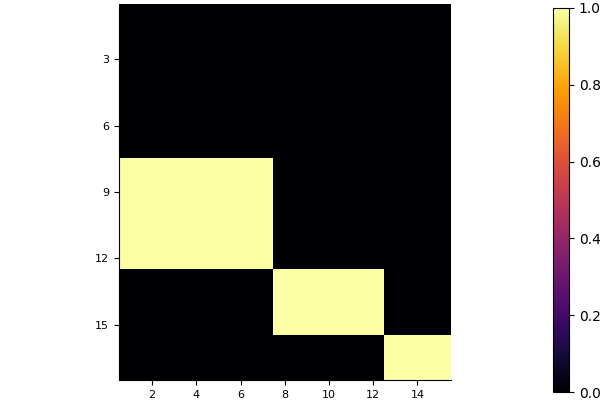

In [46]:
#pyplot()
heatmap((sign.(WW)),aspectratio=1.0)
yflip!()

In [52]:
x1 = [ones(7);0*ones(5);0*ones(3)]

15-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [56]:
x2 = WW*x1 + [10*ones(7);0*ones(5);0*ones(3);0*ones(2)]

17-element Array{Float64,1}:
 10.0    
 10.0    
 10.0    
 10.0    
 10.0    
 10.0    
 10.0    
  2.87487
  3.26217
  2.89749
  4.17944
  2.86399
  0.0    
  0.0    
  0.0    
  0.0    
  0.0    

In [69]:
x3 = WW*(x2[1:15])+ [14*ones(7);0*ones(5);0*ones(3);0*ones(2)]

17-element Array{Float64,1}:
 14.0    
 14.0    
 14.0    
 14.0    
 14.0    
 14.0    
 14.0    
 28.7487 
 32.6217 
 28.9749 
 41.7944 
 28.6399 
  6.80444
  7.19458
  7.25074
  0.0    
  0.0    

In [72]:
x4 = WW*(x3[1:15].*ones(1,10))+ [14*ones(7,10);0*ones(5,10);0*ones(3,10);0*ones(2,10)]

17×10 Array{Float64,2}:
 14.0      14.0      14.0      14.0      …  14.0      14.0      14.0    
 14.0      14.0      14.0      14.0         14.0      14.0      14.0    
 14.0      14.0      14.0      14.0         14.0      14.0      14.0    
 14.0      14.0      14.0      14.0         14.0      14.0      14.0    
 14.0      14.0      14.0      14.0         14.0      14.0      14.0    
 14.0      14.0      14.0      14.0      …  14.0      14.0      14.0    
 14.0      14.0      14.0      14.0         14.0      14.0      14.0    
 40.2482   40.2482   40.2482   40.2482      40.2482   40.2482   40.2482 
 45.6704   45.6704   45.6704   45.6704      45.6704   45.6704   45.6704 
 40.5648   40.5648   40.5648   40.5648      40.5648   40.5648   40.5648 
 58.5122   58.5122   58.5122   58.5122   …  58.5122   58.5122   58.5122 
 40.0958   40.0958   40.0958   40.0958      40.0958   40.0958   40.0958 
 68.0444   68.0444   68.0444   68.0444      68.0444   68.0444   68.0444 
 71.9458   71.9458   71.945

In [78]:
[ 0<(i-j-1)<4 ? i-j-1 : 0      for i=1:5,j=1:5]

5×5 Array{Int64,2}:
 0  0  0  0  0
 0  0  0  0  0
 1  0  0  0  0
 2  1  0  0  0
 3  2  1  0  0

In [80]:
[3 0 0 0 0
    2 3 0 0 0
1 2 3 0 0
 0 1 2 3 0
 0 0 1 2 3
0 0 0 1 2]

6×5 Array{Int64,2}:
 3  0  0  0  0
 2  3  0  0  0
 1  2  3  0  0
 0  1  2  3  0
 0  0  1  2  3
 0  0  0  1  2